In [4]:
import sympy as sp
from sympy import Matrix, symbols

# Определяем матрицу A
A = Matrix([
    [1, 2, 0, 0],
    [2, 5, 0, 0],
    [0, 0, 2, 0]
])

# 1. Находим ранг матрицы A
rank_A = A.rank()
print("1. Ранг матрицы A:", rank_A)

# 2. Размерность ядра
num_columns = A.cols
dim_kernel = num_columns - rank_A
print("2. Размерность ядра:", dim_kernel)

# 3. Базис пространства столбцов
basis_column_space = A.columnspace()
print("3. Базис пространства столбцов:")
for vec in basis_column_space:
    print(vec)

# 4. Базис ядра
basis_kernel = A.nullspace()
print("4. Базис ядра:")
for vec in basis_kernel:
    print(vec)

# 5. Приведённая ступенчатая форма (RREF)
rref_matrix, pivot_columns = A.rref()
print("5. Приведённая ступенчатая форма (RREF):")
print(rref_matrix)

# Для частного и полного решения нам нужно рассмотреть систему A*x = b
# Определяем символы для b1, b2, b3
b1, b2, b3 = symbols('b1 b2 b3')
b = Matrix([b1, b2, b3])

# Решаем систему A*x = b
# 6. Частное решение (одно из решений системы)
augmented_matrix = A.row_join(b)
rank_augmented = augmented_matrix.rank()

if rank_A == rank_augmented:
    # Система совместна, найдём частное решение
    particular_solution = Matrix([0, 0, 0])  # Начальное приближение
    # Решаем систему через rref расширенной матрицы
    augmented_rref, _ = augmented_matrix.rref()
    print("Расширенная матрица в RREF:")
    print(augmented_rref)

    # Извлекаем частное решение (зависит от b1, b2, b3)
    # После RREF: x + 2y = b1, y = (b2 - 2b1)/1, z = b3/2
    y = (b2 - 2*b1)  # Из второй строки RREF
    x = b1 - 2*y      # Из первой строки RREF
    z = b3/2          # Из третьей строки RREF
    particular_solution = Matrix([x, y, z])
    print("6. Частное решение:")
    print(particular_solution)
else:
    print("Система несовместна")

# 7. Полное решение
# Полное решение = частное решение + общее решение однородного уравнения (Ax = 0)
print("7. Полное решение:")
print("x = ", particular_solution, " + c *", basis_kernel[0], ", где c - произвольная константа")

1. Ранг матрицы A: 3
2. Размерность ядра: 1
3. Базис пространства столбцов:
Matrix([[1], [2], [0]])
Matrix([[2], [5], [0]])
Matrix([[0], [0], [2]])
4. Базис ядра:
Matrix([[0], [0], [0], [1]])
5. Приведённая ступенчатая форма (RREF):
Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
Расширенная матрица в RREF:
Matrix([[1, 0, 0, 0, 5*b1 - 2*b2], [0, 1, 0, 0, -2*b1 + b2], [0, 0, 1, 0, b3/2]])
6. Частное решение:
Matrix([[5*b1 - 2*b2], [-2*b1 + b2], [b3/2]])
7. Полное решение:
x =  Matrix([[5*b1 - 2*b2], [-2*b1 + b2], [b3/2]])  + c * Matrix([[0], [0], [0], [1]]) , где c - произвольная константа


In [19]:
import sympy as sp

# Объявляем переменные
x, y, z = sp.symbols('x y z')  # Добавили переменные для всех столбцов
b1, b2, b3 = sp.symbols('b1 b2 b3')
c = sp.symbols('c')  # Константа для общего решения

# Матрица коэффициентов (A) и правая часть (B)
A = sp.Matrix([
    [1, 2, 0, 0],
    [2, 5, 0, 0],
    [0, 0, 2, 0]
])
B = sp.Matrix([b1, b2, b3])

# Вывод исходных данных
print("Матрица A:")
sp.pprint(A)
print("\nПравая часть B:")
sp.pprint(B)

# RREF (приведённая ступенчатая форма)
rref_matrix, pivots = A.rref()
print("\nПриведённая ступенчатая форма (RREF):")
sp.pprint(rref_matrix)

# Ранг матрицы
rank = A.rank()
print("\nРанг матрицы:", rank)

# Размерность ядра (nullity = число столбцов - ранг)
nullity = A.shape[1] - rank
print("Размерность ядра (nullity):", nullity)

# Базис пространства столбцов
column_space_basis = A.columnspace()
print("\nБазис пространства столбцов:")
for vec in column_space_basis:
    sp.pprint(vec)

# Базис ядра
nullspace_basis = A.nullspace()
print("\nБазис ядра:")
for vec in nullspace_basis:
    sp.pprint(vec)

# Решение системы
try:
    # Пытаемся найти общее решение
    solution = sp.linsolve((A, B), (x, y, z))
    
    print("\nОбщее решение системы:")
    if solution:
        sp.pprint(solution)
    else:
        print("Система не имеет решений.")
    
    """# Если есть свободные переменные, представляем решение через них
    if nullity > 0 and solution:
        print("\nПолное решение с параметрами:")
        # Преобразуем решение в более читаемый вид
        sol_dict = {symbol: expr for symbol, expr in zip((x, y, z), solution.args[0])}
        sp.pprint(sol_dict)
        
        # Добавляем базис ядра с коэффициентами
        full_solution = [sol_dict.get(var, 0) for var in (x, y, z, w)]
        for i, basis_vec in enumerate(nullspace_basis):
            full_solution = [full_solution[j] + c * basis_vec[j] for j in range(len(full_solution))]
        
        print("\nПолное решение с параметром c:")
        full_sol_dict = {var: expr for var, expr in zip((x, y, z, w), full_solution)}
        sp.pprint(full_sol_dict)"""
    
except Exception as e:
    print(f"\nОшибка при решении системы: {e}")


Матрица A:
⎡1  2  0  0⎤
⎢          ⎥
⎢2  5  0  0⎥
⎢          ⎥
⎣0  0  2  0⎦

Правая часть B:
⎡b₁⎤
⎢  ⎥
⎢b₂⎥
⎢  ⎥
⎣b₃⎦

Приведённая ступенчатая форма (RREF):
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  1  0⎦

Ранг матрицы: 3
Размерность ядра (nullity): 1

Базис пространства столбцов:
⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣0⎦
⎡2⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣2⎦

Базис ядра:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

Общее решение системы:
⎧⎛                         b₃⎞⎫
⎨⎜5⋅b₁ - 2⋅b₂, -2⋅b₁ + b₂, ──⎟⎬
⎩⎝                         2 ⎠⎭


In [22]:
import sympy as sp

# Объявляем переменные
x, y, z = sp.symbols('x y z')
b1, b2, b3 = sp.symbols('b1 b2 b3')

# Матрица коэффициентов (A) и правая часть (B)
A = sp.Matrix([
    [1, 2, 0, 0],
    [2, 5, 0, 0],
    [0, 0, 2, 0]
])
B = sp.Matrix([b1, b2, b3])

# Проверка совместности системы
augmented_matrix = A.row_join(B)

# RREF (приведённая ступенчатая форма)
rref_matrix, pivots = augmented_matrix.rref()
print("\nПриведённая ступенчатая форма (RREF):")
sp.pprint(rref_matrix)

# Ранг матрицы
rank_A = A.rank()
rank_A_B = augmented_matrix.rank()
print("\nРанг матрицы A:", rank_A)
print("Ранг расширенной матрицы A|B:", rank_A_B)

# Проверка совместности системы
is_consistent = rank_A == rank_A_B
if not is_consistent:
    print("\nСистема уравнений несовместна.")
else:
    print("\nСистема уравнений совместна.")
    
    # Базис пространства столбцов
    column_space_basis = A.columnspace()
    print("\nБазис пространства столбцов:")
    for vec in column_space_basis:
        sp.pprint(vec)

    # Размерность ядра (nullity = число столбцов - ранг)
    nullity = A.shape[1] - rank_A
    print("Размерность ядра (nullity):", nullity)

    # Базис ядра
    nullspace_basis = A.nullspace()
    print("\nБазис ядра:")
    for vec in nullspace_basis:
        sp.pprint(vec)

    # Вывод результатов
    print("Матрица A:")
    sp.pprint(A)
    print("\nПравая часть B:")
    sp.pprint(B)

    # Решение системы
    sol = sp.linsolve((A, B))
    particular_solution = list(sol)[0] if sol else None
    print("\nЧастное решение системы:")
    sp.pprint(particular_solution)

    try:
        if particular_solution is not None:
            print("\nПолное решение:")
            nullspace_vector = sp.Matrix([nullspace_basis[0]]).T
            c = sp.symbols('c')
            full_solution = sp.Matrix(particular_solution) + c * nullspace_vector
            sp.pprint(full_solution)
        else:
            print("\nНе удалось найти частное решение системы.")
    except Exception as e:
        print(f"\nОшибка при вычислении полного решения: {e}")


Приведённая ступенчатая форма (RREF):
⎡1  0  0  0  5⋅b₁ - 2⋅b₂⎤
⎢                       ⎥
⎢0  1  0  0  -2⋅b₁ + b₂ ⎥
⎢                       ⎥
⎢                b₃     ⎥
⎢0  0  1  0      ──     ⎥
⎣                2      ⎦

Ранг матрицы A: 3
Ранг расширенной матрицы A|B: 3

Система уравнений совместна.

Базис пространства столбцов:
⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣0⎦
⎡2⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣2⎦
Размерность ядра (nullity): 1

Базис ядра:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦
Матрица A:
⎡1  2  0  0⎤
⎢          ⎥
⎢2  5  0  0⎥
⎢          ⎥
⎣0  0  2  0⎦

Правая часть B:
⎡b₁⎤
⎢  ⎥
⎢b₂⎥
⎢  ⎥
⎣b₃⎦

Частное решение системы:
⎛                         b₃    ⎞
⎜5⋅b₁ - 2⋅b₂, -2⋅b₁ + b₂, ──, τ₀⎟
⎝                         2     ⎠

Полное решение:

Ошибка при вычислении полного решения: Matrix size mismatch: (4, 1) + (1, 4).


In [23]:
import sympy as sp

# Векторы из условия
b = sp.Matrix([3, 4, 4])
a = sp.Matrix([2, 2, 1])
a_star = sp.Matrix([1, 0, 0])

# === 1. Проекция b на прямую вдоль a ===
proj_a = (b.dot(a) / a.dot(a)) * a
print("Проекция b на прямую вдоль a:")
sp.pprint(proj_a)

# Вектор ошибки e1 = b - proj_a
e1 = b - proj_a
print("\nВектор ошибки e1 (после первой проекции):")
sp.pprint(e1)

# Проверим ортогональность: e1 ⋅ a должно быть 0
dot_e1_a = e1.dot(a)
print("\nПроверка ортогональности e1 и a (должно быть 0):", dot_e1_a)

# === 2. Построим ортонормальный базис в плоскости, содержащей a и a* ===
# Грамм-Шмидт
u1 = a
e2 = a_star - (a_star.dot(u1) / u1.dot(u1)) * u1
u2 = e2

# Нормализация (чтобы базис был ортонормированным)
u1n = u1 / sp.sqrt(u1.dot(u1))
u2n = u2 / sp.sqrt(u2.dot(u2))

# Проекция b на плоскость (сумма проекций на u1n и u2n)
proj_plane = (b.dot(u1n)) * u1n + (b.dot(u2n)) * u2n
print("\nПроекция b на плоскость, содержащую a и a*:")
sp.pprint(proj_plane)

# Вектор ошибки e2 = b - proj_plane
e2 = b - proj_plane
print("\nВектор ошибки e2 (после проекции на плоскость):")
sp.pprint(e2)

# Проверка ортогональности ошибки e2 с a и a*
print("\nПроверка ортогональности e2 и a:", e2.dot(a))
print("Проверка ортогональности e2 и a*:", e2.dot(a_star))


Проекция b на прямую вдоль a:
⎡4⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣2⎦

Вектор ошибки e1 (после первой проекции):
⎡-1⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣2 ⎦

Проверка ортогональности e1 и a (должно быть 0): 0

Проекция b на плоскость, содержащую a и a*:
⎡ 3  ⎤
⎢    ⎥
⎢24/5⎥
⎢    ⎥
⎣12/5⎦

Вектор ошибки e2 (после проекции на плоскость):
⎡ 0  ⎤
⎢    ⎥
⎢-4/5⎥
⎢    ⎥
⎣8/5 ⎦

Проверка ортогональности e2 и a: 0
Проверка ортогональности e2 и a*: 0


In [24]:
import sympy
sympy.init_printing(use_unicode=True)

# --- Задача 1 ---
print("\n--- Задача 1 ---")
# Условия: ColSpace=Span([1,1,0], [0,0,1]), RowSpace содержит [1,2], [2,5]
A1 = sympy.Matrix([[1, 2], [1, 2], [2, 5]])
print("Матрица A1:")
sympy.pprint(A1)

target_col_space_1 = [sympy.Matrix([1, 1, 0]), sympy.Matrix([0, 0, 1])]
target_row_space_1 = [sympy.Matrix([[1, 2]]), sympy.Matrix([[2, 5]])] # Базис

col_space_A1 = A1.columnspace()
row_space_A1 = A1.rowspace()

# Проверка совпадения пространств
combined_cols_1 = sympy.Matrix.hstack(*target_col_space_1, *col_space_A1)
target_rows_matrix_1 = sympy.Matrix.vstack(*target_row_space_1)
actual_rows_matrix_1 = sympy.Matrix.vstack(*row_space_A1)

is_col_space_ok = combined_cols_1.rank() == len(target_col_space_1)
is_row_space_ok = target_rows_matrix_1.rref()[0] == actual_rows_matrix_1.rref()[0]

print(f"Пространство колонок совпадает: {is_col_space_ok}")
print(f"Пространство строк совпадает: {is_row_space_ok}")
print(f"Вывод: Матрица A1 {'удовлетворяет' if is_col_space_ok and is_row_space_ok else 'НЕ удовлетворяет'} условиям.")


# --- Задача 2 ---
print("\n--- Задача 2 ---")
# Условия: ColSpace=Span([1,1,3]), NullSpace=Span([3,1,1])
rank_2 = 1
nullity_2 = 1
n_2 = 3 # 3 столбца (из размерности вектора ядра)

print(f"Ранг={rank_2}, Размерность ядра={nullity_2}, Столбцов={n_2}")
# Проверка теоремы о ранге и дефекте: rank + nullity = n
if rank_2 + nullity_2 == n_2:
    print("Вывод: Теорема выполняется. Матрица МОЖЕТ существовать.") # Но не требуется строить
else:
    print(f"Вывод: Теорема НЕ выполняется ({rank_2 + nullity_2} != {n_2}). Матрица НЕВОЗМОЖНА.")


# --- Задача 3 ---
print("\n--- Задача 3 ---")
# Условия: NullSpace=Span([1,3]), ColSpace=Span([3,1])
A3 = sympy.Matrix([[-9, 3], [-3, 1]])
print("Матрица A3:")
sympy.pprint(A3)

target_null_space_3 = [sympy.Matrix([1, 3])]
target_col_space_3 = [sympy.Matrix([3, 1])]
rank_3 = 1
nullity_3 = 1
n_3 = 2 # 2 столбца (из размерности вектора ядра)

print(f"Ранг={rank_3}, Размерность ядра={nullity_3}, Столбцов={n_3}")
# Проверка теоремы о ранге и дефекте
if rank_3 + nullity_3 == n_3:
    null_space_A3 = A3.nullspace()
    col_space_A3 = A3.columnspace()

    # Проверка совпадения пространств
    combined_null_3 = sympy.Matrix.hstack(*target_null_space_3, *null_space_A3)
    combined_cols_3 = sympy.Matrix.hstack(*target_col_space_3, *col_space_A3)

    is_null_space_ok = combined_null_3.rank() == len(target_null_space_3)
    is_col_space_ok = combined_cols_3.rank() == len(target_col_space_3)

    print(f"Ядро совпадает: {is_null_space_ok}")
    print(f"Пространство колонок совпадает: {is_col_space_ok}")
    print(f"Вывод: Матрица A3 {'удовлетворяет' if is_null_space_ok and is_col_space_ok else 'НЕ удовлетворяет'} условиям.")
else:
     print(f"Вывод: Теорема НЕ выполняется ({rank_3 + nullity_3} != {n_3}). Матрица НЕВОЗМОЖНА.") # Не должно произойти


--- Задача 1 ---
Матрица A1:
⎡1  2⎤
⎢    ⎥
⎢1  2⎥
⎢    ⎥
⎣2  5⎦
Пространство колонок совпадает: True
Пространство строк совпадает: True
Вывод: Матрица A1 удовлетворяет условиям.

--- Задача 2 ---
Ранг=1, Размерность ядра=1, Столбцов=3
Вывод: Теорема НЕ выполняется (2 != 3). Матрица НЕВОЗМОЖНА.

--- Задача 3 ---
Матрица A3:
⎡-9  3⎤
⎢     ⎥
⎣-3  1⎦
Ранг=1, Размерность ядра=1, Столбцов=2
Ядро совпадает: True
Пространство колонок совпадает: True
Вывод: Матрица A3 удовлетворяет условиям.


In [25]:
import sympy as sp

# Данные
points = [(-1, 2), (1, 0), (-1, 0), (2, 1), (0, -1), (1, 2)]

# Разделим x и y
x_data = sp.Matrix([pt[0] for pt in points])
y_data = sp.Matrix([pt[1] for pt in points])

# -------------------------------------
# 1. Прямая: y = a*x + b
# -------------------------------------
a, b = sp.symbols('a b')
A_line = sp.Matrix([[x, 1] for x in x_data])
x_line = (A_line.T * A_line).inv() * A_line.T * y_data
a_val, b_val = x_line

# Предсказания и ошибка
y_pred_line = A_line * x_line
error_line = y_data - y_pred_line
sse_line = sum([e**2 for e in error_line])

# -------------------------------------
# 2. Парабола: y = a*x^2 + b*x + c
# -------------------------------------
a2, b2, c2 = sp.symbols('a2 b2 c2')
A_quad = sp.Matrix([[x**2, x, 1] for x in x_data])
x_quad = (A_quad.T * A_quad).inv() * A_quad.T * y_data
a2_val, b2_val, c2_val = x_quad

# Предсказания и ошибка
y_pred_quad = A_quad * x_quad
error_quad = y_data - y_pred_quad
sse_quad = sum([e**2 for e in error_quad])

# -------------------------------------
# Результаты
print("1. Прямая: y = a*x + b")
print(f"   a = {a_val}, b = {b_val}")
print(f"   Сумма квадратов ошибок SSE = {sse_line}")

print("\n2. Парабола: y = a*x^2 + b*x + c")
print(f"   a = {a2_val}, b = {b2_val}, c = {c2_val}")
print(f"   Сумма квадратов ошибок SSE = {sse_quad}")


1. Прямая: y = a*x + b
   a = 1/11, b = 7/11
   Сумма квадратов ошибок SSE = 80/11

2. Парабола: y = a*x^2 + b*x + c
   a = 2/5, b = -1/5, c = 1/5
   Сумма квадратов ошибок SSE = 32/5


In [26]:
import sympy

# 1. Данные точки
points = [(-1, 2), (1, 0), (-1, 0), (2, 1), (0, 1), (1, 2)]
x_coords = [p[0] for p in points]
y_coords = [p[1] for p in points]

# Преобразуем в матрицы SymPy
# Вектор наблюдений y (как матрица-столбец)
b = sympy.Matrix(y_coords)

# --- 2. Линейная регрессия (Прямая y = mx + c) ---
print("--- Линейная регрессия (Прямая y = mx + c) ---")

# Создаем матрицу плана A_line
# Каждая строка: [x_i, 1]
rows_line = []
for x_i in x_coords:
    rows_line.append([x_i, 1])
A_line = sympy.Matrix(rows_line)

# print("\nМатрица плана A (прямая):")
# sympy.pprint(A_line)
# print("\nВектор b:")
# sympy.pprint(b)

# Решаем систему нормальных уравнений: (A^T * A) * p = A^T * b
AtA_line = A_line.T * A_line
Atb_line = A_line.T * b

# Находим вектор параметров p = [m, c]
# Используем метод решения линейных систем solve()
params_line = AtA_line.solve(Atb_line)

m = params_line[0]
c = params_line[1]

print(f"Параметры прямой: m = {m}, c = {c}")
# sympy.pprint(f"m = {m}") # Для вывода в виде дроби, если нужно
# sympy.pprint(f"c = {c}")

# Уравнение прямой
x_sym = sympy.symbols('x')
line_eq = m * x_sym + c
print("Уравнение прямой:")
sympy.pprint(line_eq)

# Рассчитываем суммарную квадратичную ошибку (SSE)
sse_line = 0
for i in range(len(points)):
    y_pred = m * x_coords[i] + c
    sse_line += (y_coords[i] - y_pred)**2

print(f"\nСуммарная квадратичная ошибка (SSE) для прямой: {sse_line}")
# sympy.pprint(f"SSE_line = {sse_line}")


# --- 3. Полиномиальная регрессия (Парабола y = ax^2 + bx + c) ---
print("\n--- Полиномиальная регрессия (Парабола y = ax^2 + bx + c) ---")

# Создаем матрицу плана A_parab
# Каждая строка: [x_i^2, x_i, 1]
rows_parab = []
for x_i in x_coords:
    rows_parab.append([x_i**2, x_i, 1])
A_parab = sympy.Matrix(rows_parab)

# print("\nМатрица плана A (парабола):")
# sympy.pprint(A_parab)

# Решаем систему нормальных уравнений: (A^T * A) * p = A^T * b
AtA_parab = A_parab.T * A_parab
Atb_parab = A_parab.T * b

# Находим вектор параметров p = [a, b, c]
params_parab = AtA_parab.solve(Atb_parab)

a = params_parab[0]
b_p = params_parab[1] # Назовем b_p, чтобы не путать с вектором b
c_p = params_parab[2]

print(f"Параметры параболы: a = {a}, b = {b_p}, c = {c_p}")
# sympy.pprint(f"a = {a}")
# sympy.pprint(f"b = {b_p}")
# sympy.pprint(f"c = {c_p}")

# Уравнение параболы
parab_eq = a * x_sym**2 + b_p * x_sym + c_p
print("Уравнение параболы:")
sympy.pprint(parab_eq)

# Рассчитываем суммарную квадратичную ошибку (SSE)
sse_parab = 0
for i in range(len(points)):
    y_pred = a * x_coords[i]**2 + b_p * x_coords[i] + c_p
    sse_parab += (y_coords[i] - y_pred)**2

print(f"\nСуммарная квадратичная ошибка (SSE) для параболы: {sse_parab}")
# sympy.pprint(f"SSE_parab = {sse_parab}")

# --- 4. Сравнение ошибок ---
print("\n--- Сравнение ---")
print(f"SSE для прямой:   {sse_line.evalf():.4f}") # evalf() для получения числового значения
print(f"SSE для параболы: {sse_parab.evalf():.4f}")

if sse_parab < sse_line:
    print("Парабола лучше описывает данные (меньше ошибка).")
elif sse_line < sse_parab:
     print("Прямая лучше описывает данные (меньше ошибка).")
else:
     print("Обе модели имеют одинаковую ошибку.")

--- Линейная регрессия (Прямая y = mx + c) ---
Параметры прямой: m = 0, c = 1
Уравнение прямой:
1

Суммарная квадратичная ошибка (SSE) для прямой: 4

--- Полиномиальная регрессия (Парабола y = ax^2 + bx + c) ---
Параметры параболы: a = 0, b = 0, c = 1
Уравнение параболы:
1

Суммарная квадратичная ошибка (SSE) для параболы: 4

--- Сравнение ---
SSE для прямой:   4.0000
SSE для параболы: 4.0000
Обе модели имеют одинаковую ошибку.


In [31]:
import sympy as sp

# 1. Определяем символьные переменные для углов
theta, gamma = sp.symbols('theta gamma')

# 2. Задаем матрицу поворота вокруг оси Z на угол theta
Rz_theta = sp.Matrix([
    [sp.cos(theta), -sp.sin(theta), 0],
    [sp.sin(theta),  sp.cos(theta), 0],
    [0,              0,             1]
])

# 3. Задаем матрицу поворота вокруг оси Y на угол gamma
Ry_gamma = sp.Matrix([
    [ sp.cos(gamma), 0, sp.sin(gamma)],
    [ 0,             1, 0            ],
    [-sp.sin(gamma), 0, sp.cos(gamma)]
])

# 4. Вычисляем итоговую матрицу поворота R(theta, gamma)
# Порядок умножения: вторая трансформация * первая трансформация
R_combined = Rz_theta * Ry_gamma

# 5. Выводим результаты
print("Матрица поворота вокруг Z на угол theta:")
sp.pprint(Rz_theta)

print("\nМатрица поворота вокруг Y на угол gamma:")
sp.pprint(Ry_gamma)

print("\nИтоговая матрица поворота R(theta, gamma) = Ry(gamma) * Rz(theta):")
sp.pprint(R_combined)


Матрица поворота вокруг Z на угол theta:
⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

Матрица поворота вокруг Y на угол gamma:
⎡cos(γ)   0  sin(γ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(γ)  0  cos(γ)⎦

Итоговая матрица поворота R(theta, gamma) = Ry(gamma) * Rz(theta):
⎡cos(γ)⋅cos(θ)  -sin(θ)  sin(γ)⋅cos(θ)⎤
⎢                                     ⎥
⎢sin(θ)⋅cos(γ)  cos(θ)   sin(γ)⋅sin(θ)⎥
⎢                                     ⎥
⎣   -sin(γ)        0        cos(γ)    ⎦


In [32]:
import cv2
import numpy as np
import os # Для проверки существования файла

# --- Параметры ---
input_filename = 'triangle.png'
output_filename = 'modified_affine.png' # Немного изменим имя выходного файла

# --- Создание изображения-заглушки, если исходного нет ---
# (Можно удалить этот блок, если у вас есть файл triangle.png)
if not os.path.exists(input_filename):
    print(f"Файл '{input_filename}' не найден. Создается изображение-заглушка.")
    height, width = 100, 100
    img_placeholder = np.full((height, width, 3), 255, dtype=np.uint8)
    pts = np.array([[width // 2, 10], [10, height - 10], [width - 10, height - 10]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_placeholder, [pts], (255, 0, 0))
    cv2.imwrite(input_filename, img_placeholder)
    print(f"Заглушка '{input_filename}' создана.")
# ---------------------------------------------------------

# 1. Загрузка исходного изображения
img_original = cv2.imread(input_filename)

# Проверка, что изображение загрузилось
if img_original is None:
    print(f"Ошибка: не удалось загрузить изображение '{input_filename}'")
else:
    print(f"Изображение '{input_filename}' успешно загружено.")
    # Получаем размеры изображения
    height, width = img_original.shape[:2]
    # Определяем размер выходного изображения (для warpAffine)
    dsize = (width, height)

    # 2. Определение матриц аффинных преобразований для отражений
    # Убедимся, что тип данных float32, как ожидает warpAffine
    # Горизонтальное отражение
    M_h = np.float32([[-1,0, width],[0,1,0]])
    # Вертикальное отражение
    M_v = np.float32([[1,0,0],[ 0,-1, height ]])
    # Отражение по обеим осям
    M_hv = np.float32([[-1,0, width],[ 0, -1, height ]])

    # 3. Применение аффинных преобразований
    # cv2.warpAffine(исходное_изобр, матрица_преобр, размер_выхода)
    img_transformed_h = cv2.warpAffine(img_original, M_h, dsize) # Верхний правый
    img_transformed_v = cv2.warpAffine(img_original, M_v, dsize) # Нижний левый
    img_transformed_hv = cv2.warpAffine(img_original, M_hv, dsize) # Нижний правый

    # 4. Склейка изображений (логика та же)
    top_row = np.hstack((img_original, img_transformed_h))
    bottom_row = np.hstack((img_transformed_v, img_transformed_hv))
    final_image = np.vstack((top_row, bottom_row))

    # 5. Сохранение результата
    cv2.imwrite(output_filename, final_image)
    print(f"Итоговое изображение сохранено как '{output_filename}'")

    # 6. Отображение результата (опционально)
    # cv2.imshow('Original', img_original)
    # cv2.imshow('Modified Affine', final_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Файл 'triangle.png' не найден. Создается изображение-заглушка.
Заглушка 'triangle.png' создана.
Изображение 'triangle.png' успешно загружено.
Итоговое изображение сохранено как 'modified_affine.png'


Размер вертикального стека (верхний и нижний): (200, 100, 4)
Размер горизонтального стека (левый и правый): (100, 200, 4)


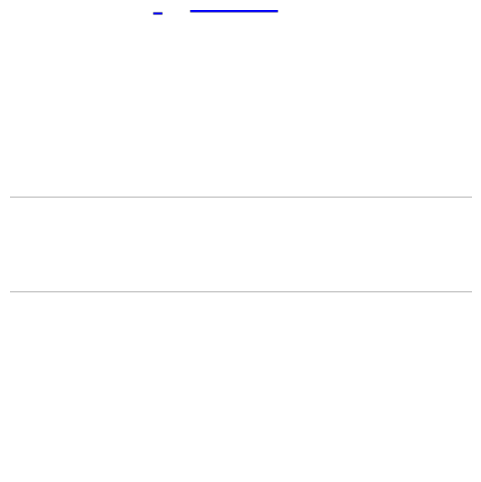

In [36]:
import numpy as np
from PIL import Image
from sympy import Matrix, cos, sin, pi

# Шаг 1: Загружаем исходное изображение
image = Image.open('triangle.png').convert('RGBA')  # Конвертируем в RGBA для работы с прозрачностью
image_array = np.array(image)

# Получаем размеры изображения
height, width = image_array.shape[:2]

# Убедимся, что фон прозрачный (если фон белый, заменим его на прозрачный)
image_array[(image_array[:, :, 0] == 255) & (image_array[:, :, 1] == 255) & (image_array[:, :, 2] == 255)] = [0, 0, 0, 0]
image = Image.fromarray(image_array)

# Шаг 2: Определяем аффинные преобразования с помощью SymPy
# SymPy будет использоваться для создания матриц аффинных преобразований

# 2.1. Верхний треугольник (сдвиг в центр верхней части)
# Матрица сдвига: [1, 0, t_x; 0, 1, t_y; 0, 0, 1]
# Сдвинем на width/2 по x
M_upper = Matrix([
    [1, 0, width/2],
    [0, 1, 0],
    [0, 0, 1]
])
upper_transform = tuple(np.array(M_upper[:2, :]).T.flatten().tolist())  # Преобразуем в формат для Pillow (a, b, c, d, e, f)
upper_image = image.transform((width, height), Image.AFFINE, upper_transform, resample=Image.BICUBIC)

# 2.2. Нижний треугольник (отражение по оси y и сдвиг вниз)
# Отражение по y: [1, 0, 0; 0, -1, 0; 0, 0, 1]
# Сдвиг вниз на height пикселей: [1, 0, 0; 0, 1, t_y; 0, 0, 1]
reflection_y = Matrix([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])
shift_down = Matrix([
    [1, 0, 0],
    [0, 1, height],
    [0, 0, 1]
])
M_lower = shift_down @ reflection_y @ Matrix([
    [1, 0, width/2],
    [0, 1, 0],
    [0, 0, 1]
])
lower_transform = tuple(np.array(M_lower[:2, :]).T.flatten().tolist())
lower_image = image.transform((width, height), Image.AFFINE, lower_transform, resample=Image.BICUBIC)

# 2.3. Левый треугольник (поворот на 90° против часовой стрелки и сдвиг влево)
# Поворот на 90° против часовой стрелки: [cos(90°), -sin(90°), 0; sin(90°), cos(90°), 0; 0, 0, 1]
rotation_90_ccw = Matrix([
    [cos(pi/2), -sin(pi/2), 0],
    [sin(pi/2), cos(pi/2), 0],
    [0, 0, 1]
])
# Сдвиг влево на 0 по x и вниз на height/2 по y
shift_left = Matrix([
    [1, 0, 0],
    [0, 1, height/2],
    [0, 0, 1]
])
M_left = shift_left @ rotation_90_ccw
left_transform = tuple(np.array(M_left[:2, :]).T.flatten().tolist())
left_image = image.transform((width, height), Image.AFFINE, left_transform, resample=Image.BICUBIC)

# Изменяем цвет с синего на белый
left_array = np.array(left_image)
blue_mask = (left_array[:, :, 0] == 0) & (left_array[:, :, 1] == 0) & (left_array[:, :, 2] > 0) & (left_array[:, :, 3] > 0)
left_array[blue_mask] = [255, 255, 255, 255]  # Меняем синий на белый
left_image = Image.fromarray(left_array)

# 2.4. Правый треугольник (поворот на 90° по часовой стрелке и сдвиг вправо)
# Поворот на 90° по часовой стрелке: [cos(-90°), -sin(-90°), 0; sin(-90°), cos(-90°), 0; 0, 0, 1]
rotation_90_cw = Matrix([
    [cos(-pi/2), -sin(-pi/2), 0],
    [sin(-pi/2), cos(-pi/2), 0],
    [0, 0, 1]
])
# Сдвиг вправо на width по x и вниз на height/2 по y
shift_right = Matrix([
    [1, 0, width],
    [0, 1, height/2],
    [0, 0, 1]
])
M_right = shift_right @ rotation_90_cw
right_transform = tuple(np.array(M_right[:2, :]).T.flatten().tolist())
right_image = image.transform((width, height), Image.AFFINE, right_transform, resample=Image.BICUBIC)

# Изменяем цвет с синего на белый
right_array = np.array(right_image)
right_array[blue_mask] = [255, 255, 255, 255]  # Меняем синий на белый
right_image = Image.fromarray(right_array)

# Шаг 3: Создаём итоговое изображение
# Итоговое изображение должно быть размером (2*height, 2*width), чтобы вместить все треугольники
final_height = 2 * height
final_width = 2 * width
final_image = np.zeros((final_height, final_width, 4), dtype=np.uint8)

# Функция для наложения изображения с учётом прозрачности
def overlay_image(background, overlay, x_offset, y_offset):
    overlay_array = np.array(overlay)
    h, w = overlay_array.shape[:2]
    for i in range(h):
        for j in range(w):
            if overlay_array[i, j, 3] > 0:  # Если пиксель не прозрачный
                y = i + y_offset
                x = j + x_offset
                if 0 <= y < background.shape[0] and 0 <= x < background.shape[1]:
                    background[y, x] = overlay_array[i, j]

# Накладываем треугольники на итоговое изображение
# Верхний треугольник
overlay_image(final_image, upper_image, width//2, 0)

# Нижний треугольник
overlay_image(final_image, lower_image, width//2, height)

# Левый треугольник
overlay_image(final_image, left_image, 0, height//2)

# Правый треугольник
overlay_image(final_image, right_image, width, height//2)

# Шаг 4: Используем np.hstack() и np.vstack() для демонстрации объединения
# Объединим верхний и нижний треугольники по вертикали
upper_array = np.array(upper_image)
lower_array = np.array(lower_image)
vertical_stack = np.vstack((upper_array, lower_array))

# Объединим левый и правый треугольники по горизонтали
left_array = np.array(left_image)
right_array = np.array(right_image)
horizontal_stack = np.hstack((left_array, right_array))

# Выводим размеры для демонстрации
print("Размер вертикального стека (верхний и нижний):", vertical_stack.shape)
print("Размер горизонтального стека (левый и правый):", horizontal_stack.shape)

# Шаг 5: Сохраняем итоговое изображение
final_image_pil = Image.fromarray(final_image)
final_image_pil.save('modified.png')

# (Опционально) Визуализация результата
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(final_image)
plt.axis('off')
plt.show()

In [37]:
from PIL import Image
import numpy as np
from sympy import Matrix, symbols, Eq, solve
import matplotlib.pyplot as plt

def apply_affine_transform(image, transform_matrix, output_size=None, color_change=None):
    """
    Применяет аффинное преобразование к изображению с возможным изменением цвета.
    
    Args:
        image: исходное изображение (PIL Image)
        transform_matrix: матрица аффинного преобразования 3x3
        output_size: размер выходного изображения (ширина, высота)
        color_change: функция для изменения цвета (принимает и возвращает массив numpy)
    
    Returns:
        Преобразованное изображение (PIL Image)
    """
    # Преобразуем изображение в массив numpy
    img_array = np.array(image)
    
    # Если изображение имеет альфа-канал, работаем с RGBA, иначе с RGB
    has_alpha = img_array.shape[2] == 4 if len(img_array.shape) > 2 else False
    
    # Создаем новое изображение
    if output_size is None:
        output_size = image.size
    
    # Создаем координатную сетку для выходного изображения
    x, y = np.meshgrid(np.arange(output_size[0]), np.arange(output_size[1]))
    coords = np.vstack((x.flatten(), y.flatten(), np.ones(x.size)))
    
    # Применяем обратное преобразование
    inv_transform = Matrix(transform_matrix).inv().tolist()
    transformed_coords = np.dot(inv_transform[:2], coords)
    
    # Масштабируем координаты к размеру исходного изображения
    src_width, src_height = image.size
    transformed_coords[0, :] = transformed_coords[0, :] * src_width / output_size[0]
    transformed_coords[1, :] = transformed_coords[1, :] * src_height / output_size[1]
    
    # Интерполируем значения пикселей
    from scipy.ndimage import map_coordinates
    channels = []
    for c in range(img_array.shape[2]):
        channel = map_coordinates(img_array[:, :, c], transformed_coords, order=1, mode='constant', cval=0)
        channel = channel.reshape(output_size[1], output_size[0])
        channels.append(channel)
    
    result_array = np.stack(channels, axis=-1)
    
    # Применяем изменение цвета, если нужно
    if color_change is not None:
        result_array = color_change(result_array)
    
    # Преобразуем обратно в изображение
    if has_alpha:
        return Image.fromarray(result_array.astype(np.uint8), 'RGBA')
    else:
        return Image.fromarray(result_array.astype(np.uint8), 'RGB')

def blue_to_white(img_array):
    """Изменяет синий цвет на белый"""
    # Находим пиксели, которые в основном синие (синий канал значительно больше других)
    blue_mask = (img_array[:, :, 2] > img_array[:, :, 0] * 1.5) & (img_array[:, :, 2] > img_array[:, :, 1] * 1.5)
    
    # Создаем копию массива
    result = img_array.copy()
    
    # Для пикселей, удовлетворяющих условию, устанавливаем белый цвет
    result[blue_mask] = [255, 255, 255, 255] if img_array.shape[2] == 4 else [255, 255, 255]
    
    return result

def create_diamond_triangle():
    # Загружаем исходное изображение
    try:
        original_img = Image.open('triangle.png').convert('RGBA')
    except FileNotFoundError:
        print("Файл triangle.png не найден. Убедитесь, что он находится в той же директории.")
        return
    
    # Получаем размеры изображения
    width, height = original_img.size
    
    # Определяем аффинные преобразования
    
    # 1. Верхний треугольник (без изменений, только небольшой сдвиг для центрирования)
    top_transform = [
        [1, 0, -width/4],
        [0, 1, -height/4],
        [0, 0, 1]
    ]
    
    # 2. Нижний треугольник (отражение по y и сдвиг вниз)
    bottom_transform = [
        [1, 0, -width/4],
        [0, -1, height + height/4],
        [0, 0, 1]
    ]
    
    # 3. Левый треугольник (поворот на 90° против часовой стрелки и сдвиг влево)
    left_transform = [
        [0, -1, width/2],
        [1, 0, height/2],
        [0, 0, 1]
    ]
    
    # 4. Правый треугольник (поворот на 90° по часовой стрелке и сдвиг вправо)
    right_transform = [
        [0, 1, 0],
        [-1, 0, height],
        [0, 0, 1]
    ]
    
    # Применяем преобразования к изображению
    
    # Верхний и нижний треугольники (синие)
    top_img = apply_affine_transform(original_img, top_transform, (width, height))
    bottom_img = apply_affine_transform(original_img, bottom_transform, (width, height))
    
    # Левый и правый треугольники (белые)
    left_img = apply_affine_transform(original_img, left_transform, (width, height), blue_to_white)
    right_img = apply_affine_transform(original_img, right_transform, (width, height), blue_to_white)
    
    # Объединяем изображения в ромб
    
    # Верхняя строка: [пустое место, верхний треугольник, пустое место]
    top_row = np.hstack([
        np.zeros((height, width, 4), dtype=np.uint8),  # Пустое место
        np.array(top_img),                             # Верхний треугольник
        np.zeros((height, width, 4), dtype=np.uint8)   # Пустое место
    ])
    
    # Средняя строка: [левый треугольник, пустое место, правый треугольник]
    middle_row = np.hstack([
        np.array(left_img),                            # Левый треугольник
        np.zeros((height, width, 4), dtype=np.uint8),  # Пустое место
        np.array(right_img)                            # Правый треугольник
    ])
    
    # Нижняя строка: [пустое место, нижний треугольник, пустое место]
    bottom_row = np.hstack([
        np.zeros((height, width, 4), dtype=np.uint8),  # Пустое место
        np.array(bottom_img),                          # Нижний треугольник
        np.zeros((height, width, 4), dtype=np.uint8)   # Пустое место
    ])
    
    # Объединяем все строки
    final_array = np.vstack([top_row, middle_row, bottom_row])
    
    # Создаем и сохраняем итоговое изображение
    final_img = Image.fromarray(final_array)
    final_img.save('modified.png')
    print("Изображение успешно сохранено как modified.png")
    
    # Показываем результат (опционально)
    plt.imshow(final_img)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    create_diamond_triangle()


ModuleNotFoundError: No module named 'scipy'